<a href="https://colab.research.google.com/github/willbastosferreira/projetos_ds/blob/main/SQL_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória Utilizando Python e SQL

A seguir uma análise exploratória utilizando PYTHON e SQL. A base de dados será um arquivo .db, através do tratamento de dados e modelagem de dados, tentaremos trazer alguns insights interessantes que possam auxiliar a tomada de decisão utilizando dados.

**Objetivos:**
 - Conectar ao banco e desenvolver as querys para obter os dados.
 - Realizar análise descritiva dos dados utilizando linguagem Python e SQL.


## Descrição do Dataset

O arquivo .db contém as seguintes tabelas:

1.  **accounts:**
Tabela que apresenta as informações cadastrais de cada conta.
    <br>

    Colunas:
    - id: ID identificador da tabela
    - account number: Número da conta
    - birth: Data de nascimento
    - occupation: Tipo de negócio autodeclarado
    - email: E-mail da conta
    - address id: ID identificador da tabela address
    - created at: Data de criação da conta       

<br>

2. **address:**
Tabela que identifica os pares de estado e cidade.
<br>

    Colunas:
    - id: ID identificador da tabela
    - state: Estado de residência do cliente
    - city: Cidade de residência do cliente
    
<br>

    
3. **levels:**
Cada conta recebe uma classificação de acordo com a forma que utiliza a plataforma. Contas que utilizam
com maior consistência ou com grande potêncial podem receber uma melhor classificação (A>B>C>)
Caso identifique-se que a conta possui características suspeitas, de fraude, é atribuída a categoria F e
executado o encerramento).
<br>

    Colunas:
    - id: ID identificador da tabela
    - account number: Número da conta
    - level: A, B, C, D e F
    - created at: Data da classificação

<br>

4. **charges:**
Apresenta as emissões de boletos realizadas pelos clientes com os respectivos status de pago ou não.
<br>

    Colunas:
    - id: íD identificador da tabela
    - account_number: Número da conta
    - status: Status da cobrança {gaid, unpaid]
    - value: Valor da cobrança (em centavos)
    - created_at: Data de criação do boleto
    
<br>

5. **transactions:**
As transações efetivadas por cada conta, logo, caso um boleto tenha sido pago esta informação estará
presente nesta tabela e na tabela charges.
<br>

    Colunas:
    - id: ID identificador da tabela
    - account_number: Número da conta
    - transaction_type_id: ID identificador da tabela transaction_type
    - value: Valor da transação (em centavos)
    - created_at: Data da transação
    
<br>
    
6. **transaction_type:**
Permite identificar qual o tipo de cada transação da tabela transactions.
<br>

    Colunas:
    - id: ID identificador da tabela"
    - description: boleto_recebido, pix_enviado e pix_recebido
    - description_long: 'BOLETO RECEBIDO PELO CLIENTE', 'PIX ENVIADO PELO CLIENTE PARA UMA CONTA EXTERNA' e 'PIX RECEBIDO PELO CLIENTE


In [ ]:
#instalando bibliotecas

!pip install sweetviz



ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\basfe\\anaconda3\\lib\\site-packages\\numpy-1.24.3.dist-info\\METADATA'



In [ ]:
!pip install numpy

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\basfe\\anaconda3\\lib\\site-packages\\numpy-1.24.3.dist-info\\METADATA'



In [ ]:
#importando bibliotecas

#conexão com sql
import sqlite3

#Manipulação de dados
import pandas as pd
import numpy as np
import datetime as dt

#Visualização de dados
#import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt

import warnings


In [ ]:
#estabelecendo conexão

conn = sqlite3.connect('C:\desafio-tecnico.db')

In [ ]:
cursor = conn.cursor()


### Analisando a tabela 'accounts'

In [ ]:
cursor.execute("SELECT * FROM accounts")
result = cursor.fetchall()

for row in result:
    print(row)


(1, 155938, '1984-10-29', 'Outros', 'mariaceciliaazevedo042@example.com', 1, '2021-04-01 02:30:00')
(2, 747007, '1977-03-26', 'Corretor', 'ananunes3@example.com', 2, '2021-04-01 02:00:00')
(3, 208404, '1984-01-26', 'Analista', 'luizfernandovieira@example.com', 3, '2021-04-01 11:30:00')
(4, 66402, '1982-06-30', 'Investidor', 'gabriellynascimento6@example.com', 4, '2021-04-01 14:30:00')
(5, 277012, '1967-01-11', 'Outros', 'aliciagoncalves7@example.com', 5, '2021-04-02 15:30:00')
(6, 228213, '1983-11-29', 'Analista', 'arthurlopes@example.com', 6, '2021-04-02 05:00:00')
(7, 108762, '1982-10-15', 'Analista', 'joaquimramos3@example.com', 7, '2021-04-02 12:30:00')
(8, 309054, '1990-01-07', 'Desenvolvedor', 'mariaalves2@example.com', 8, '2021-04-02 15:00:00')
(9, 89836, '1981-07-04', 'Investidor', 'larissafogaca9@example.com', 9, '2021-04-02 15:30:00')
(10, 343595, '1982-11-06', 'Analista', 'daviluizmelo@example.com', 10, '2021-04-02 03:30:00')
(11, 760897, '1995-05-26', 'Desenvolvedor', 'rafa

In [ ]:
dados = pd.read_sql("SELECT * FROM accounts", conn)

In [ ]:
dados.head()

,id,account_number,birth,occupation,email,address_id,created_at
0,1,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,1,2021-04-01 02:30:00
1,2,747007,1977-03-26,Corretor,ananunes3@example.com,2,2021-04-01 02:00:00
2,3,208404,1984-01-26,Analista,luizfernandovieira@example.com,3,2021-04-01 11:30:00
3,4,66402,1982-06-30,Investidor,gabriellynascimento6@example.com,4,2021-04-01 14:30:00
4,5,277012,1967-01-11,Outros,aliciagoncalves7@example.com,5,2021-04-02 15:30:00


In [ ]:
dados.tail()

,id,account_number,birth,occupation,email,address_id,created_at
1024,1025,385922,2003-05-20,Analista,evelynviana3@example.com,745,2021-07-10 03:30:00
1025,1026,37393,1996-01-20,Investidor,anaclaraporto9@example.com,505,2021-07-10 04:30:00
1026,1027,714025,1981-07-21,Corretor,miguelribeiro3@example.com,746,2021-07-10 15:00:00
1027,1028,708615,1967-03-14,Corretor,mariaeduardadarocha@example.com,747,2021-07-10 21:30:00
1028,1029,418641,1992-06-10,Corretor,heitordaluz@example.com,12,2021-07-10 02:00:00


In [ ]:
# tamanho da base

linhas, colunas = dados.shape
print('Há {} linhas e {} colunas na tabela accounts.' .format(linhas, colunas))

Há 1029 linhas e 7 colunas na tabela accounts.


In [ ]:
# descobrindo o perído da análise

inicio = pd.to_datetime(dados['created_at']).dt.date.min()
fim = pd.to_datetime(dados['created_at']).dt.date.max()

print('O perído de análise foi de {} a {}.'.format(inicio, fim))

O perído de análise foi de 2021-04-01 a 2021-07-10.


## Analisando a Tabela 'transactions'

As transações efetivadas por cada conta, logo, caso um boleto tenha sido pago esta informação estará presente nesta tabela e na tabela charges.

### Dicionários de Dados

Tipos de Transações

1 = Boleto Recebido pelo Cliente

2 = Pix Enviado Pelo Cliente para Uma Conta Externa

3 = Pix Recebido Pelo Cliente



In [ ]:

df_transactions = pd.read_sql("SELECT * FROM transactions", conn)
df_transactions.head()

,id,account_number,transaction_type_id,value,created_at
0,1,155938,1,11992,2021-04-01 03:00:00
1,2,155938,1,9689,2021-04-01 13:30:00
2,3,155938,1,11579,2021-04-01 11:30:00
3,4,155938,3,11168,2021-04-01 11:00:00
4,5,155938,3,10772,2021-04-01 21:00:00


In [ ]:
df_transactions.tail()

,id,account_number,transaction_type_id,value,created_at
256222,256223,947006,2,52144,2021-07-10 22:30:00
256223,256224,354382,2,15723,2021-07-10 22:30:00
256224,256225,654870,2,18844,2021-07-10 04:30:00
256225,256226,909353,2,22633,2021-07-10 06:00:00
256226,256227,897231,2,81441,2021-07-10 09:00:00


In [ ]:
# saber tamanho da base

linhas, colunas = df_transactions.shape
print('Há {} linhas e {} colunas na tabela transactions.' .format(linhas, colunas))

Há 256227 linhas e 5 colunas na tabela transactions.


In [ ]:
# tipo de dados

df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256227 entries, 0 to 256226
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   256227 non-null  int64 
 1   account_number       256227 non-null  int64 
 2   transaction_type_id  256227 non-null  int64 
 3   value                256227 non-null  int64 
 4   created_at           256227 non-null  object
dtypes: int64(4), object(1)
memory usage: 9.8+ MB


In [ ]:
# quantidade de valores únicos

df_transactions.account_number.nunique()

880

In [ ]:
#verificando dados faltantes

df_transactions.isnull().sum()

id                     0
account_number         0
transaction_type_id    0
value                  0
created_at             0
dtype: int64

Não temos dados faltantes.

In [ ]:
#informações estatísticas sumarizadas

df_transactions.value.describe().round(2)

count     256227.00
mean        9926.69
std        28497.88
min         1725.00
25%         3981.00
50%         5151.00
75%         6870.00
max      1512039.00
Name: value, dtype: float64

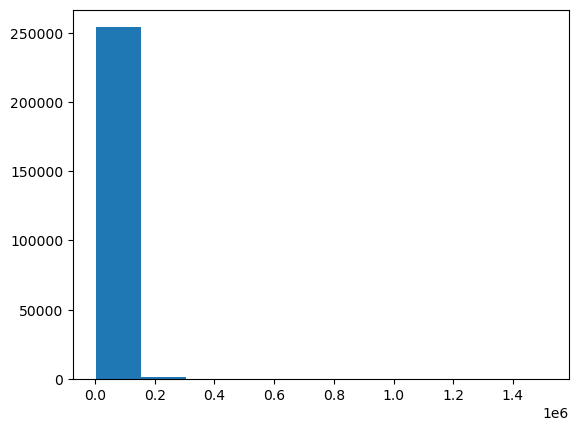

In [ ]:
# Criando um histograma para verificarmos a distribuição dos valores das transações
plt.hist(df_transactions.value.round(2))

plt.show()



Observamos uma assimetria à direita. Ou seja, a maioria dos valores estão à esquerda da média.

**Entendendo melhor essas informações**



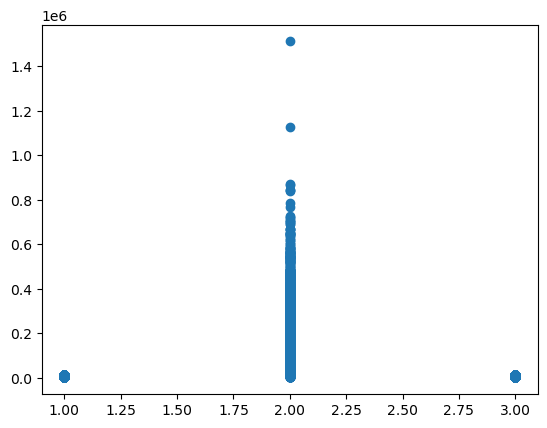

In [ ]:
# utilizando o um gráfico de dispersão

plt.scatter(df_transactions.transaction_type_id,df_transactions.value)
plt.show()

Percebe-se que os maiores valores transacionados são do tipo 2 (Pix Enviado Pelo Cliente para Uma Conta Externa).

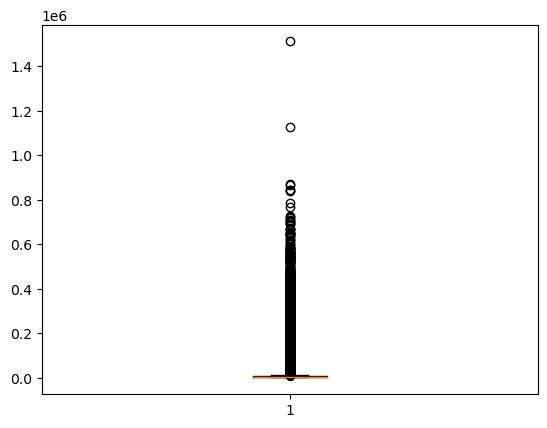

In [ ]:
# utilizando boxplot

plt.boxplot(df_transactions.value)
plt.show()

Percebemos muitos outliers e uma má distribuição dos valores. Por ser valores acerca de transações, os dados tem valores variados, sem um padrão para transações. O boxplot não faz sentido para essa análise nesse momento.

In [ ]:
# quantidade para cada categoria da feature 'transaction_type'

df_transactions.transaction_type_id.value_counts()

3    147938
1     96787
2     11502
Name: transaction_type_id, dtype: int64

Temos 147938 transações do tipo 3, 96787 do tipo 1 e 11502 do tipo 2.

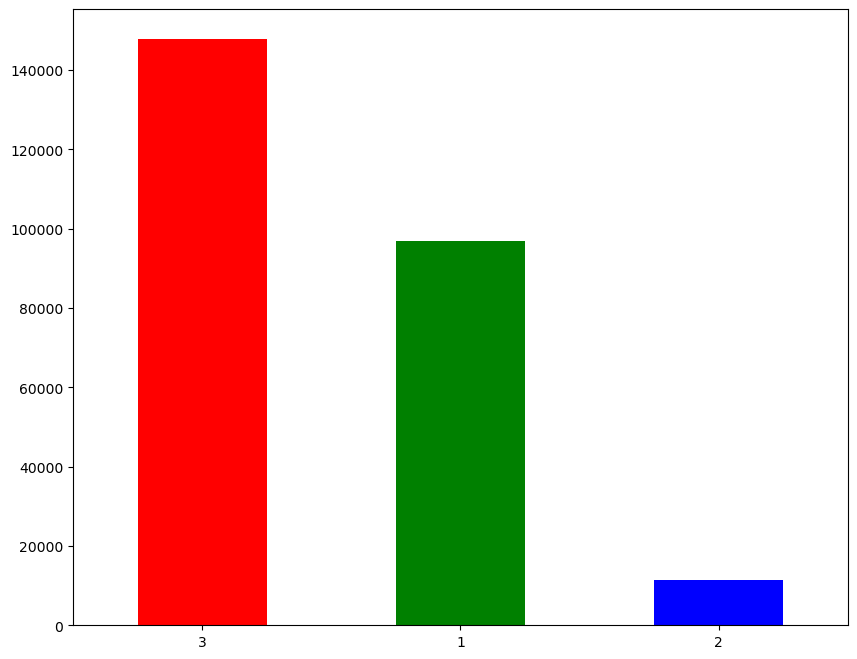

In [ ]:
#visualizando graficamente

df_transactions.transaction_type_id.value_counts().plot(kind='bar', figsize=(10,8), color=['red', 'green', 'blue'])
plt.xticks( rotation=0) ;


## Mesclando as tabelas 'accounts' e 'transactions'

- accounts: Tabela que apresenta as informações cadastrais de cada conta.

In [ ]:
# criando um left join entre as tabelas 'accounts' e 'transactions'

In [ ]:
query = '''
SELECT accounts.account_number, birth, occupation, address_id, transaction_type_id, value
FROM accounts
LEFT JOIN  transactions ON accounts.account_number = transactions.account_number
'''

cursor.execute(query)
result = cursor.fetchall()

for row in result:
    print(row)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df_accounts_transactions = pd.read_sql(query, conn)

In [ ]:
df_accounts_transactions.head(100)

,account_number,birth,occupation,address_id,transaction_type_id,value
0,155938,1984-10-29,Outros,1,1.0,9689.0
1,155938,1984-10-29,Outros,1,1.0,9731.0
2,155938,1984-10-29,Outros,1,1.0,10169.0
3,155938,1984-10-29,Outros,1,1.0,10280.0
4,155938,1984-10-29,Outros,1,1.0,10531.0
...,...,...,...,...,...,...
95,155938,1984-10-29,Outros,1,3.0,12171.0
96,155938,1984-10-29,Outros,1,3.0,12311.0
97,155938,1984-10-29,Outros,1,3.0,12401.0
98,155938,1984-10-29,Outros,1,3.0,12489.0


In [ ]:
# criando um crosstab entre 'occupation' e 'transaction_type_id'

pd.crosstab(df_accounts_transactions.transaction_type_id, df_accounts_transactions.occupation)

occupation,Analista,Autonomo,Corretor,Desenvolvedor,Investidor,Outros
transaction_type_id,,,,,,
1.0,25565,4353,21302,24960,8353,12254
2.0,2464,727,2440,2430,1358,2083
3.0,37119,7769,32754,35263,15754,19279


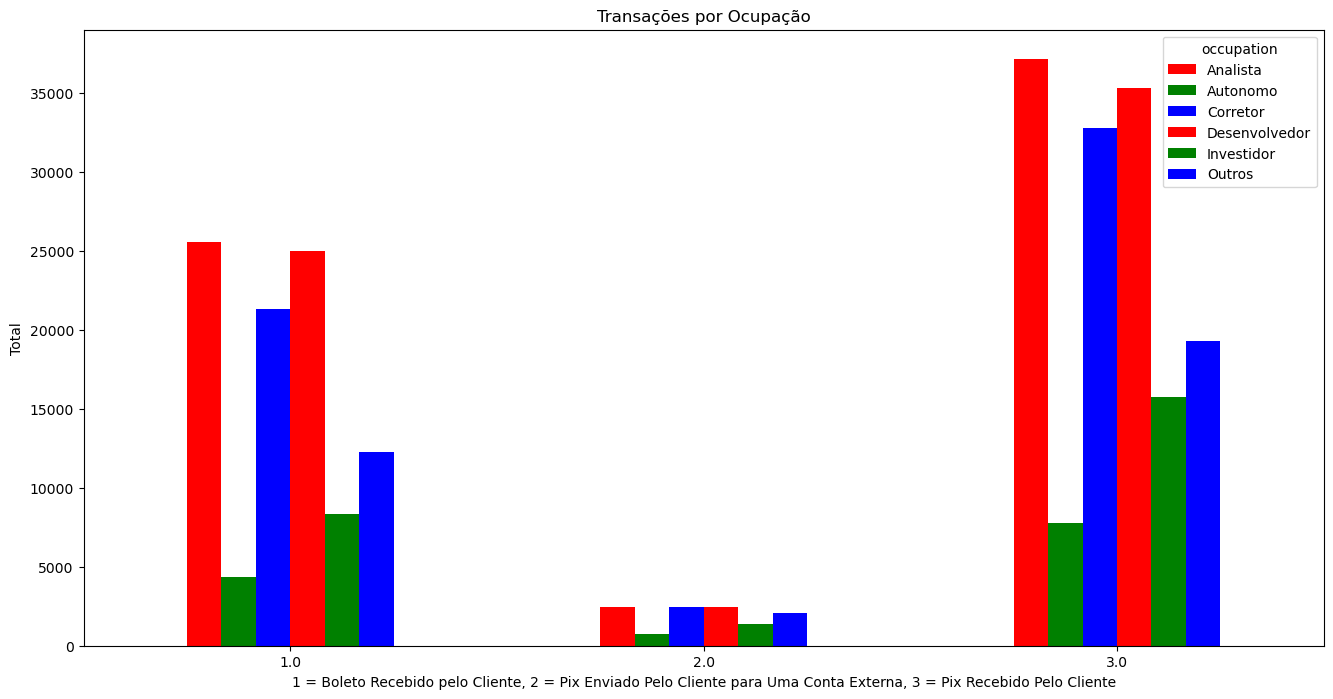

In [ ]:
#graficamente

df_cross1 = pd.crosstab(df_accounts_transactions.transaction_type_id, df_accounts_transactions.occupation).plot(kind='bar', figsize=(16,8), color=['red', 'green', 'blue'])
plt.title( "Transações por Ocupação" )
plt.xlabel( "1 = Boleto Recebido pelo Cliente, 2 = Pix Enviado Pelo Cliente para Uma Conta Externa, 3 = Pix Recebido Pelo Cliente" )
plt.ylabel( "Total" )
#plt.legend( )
plt.xticks( rotation=0) ;






## Analisando a tabela 'charges'

Apresenta as emissões de boletos realizadas pelos clientes com os respectivos status de pago ou não

In [ ]:
df_charges = pd.read_sql("SELECT * FROM charges", conn)
df_charges.head()

,id,account_number,status,value,created_at
0,1,155938,paid,11992,2021-04-01 03:00:00
1,2,155938,paid,9689,2021-04-01 13:30:00
2,3,155938,paid,11579,2021-04-01 11:30:00
3,4,747007,unpaid,3134,2021-04-02 12:00:00
4,5,747007,paid,3085,2021-04-02 19:00:00


In [ ]:
# tipo de dados

df_charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154469 entries, 0 to 154468
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              154469 non-null  int64 
 1   account_number  154469 non-null  int64 
 2   status          154469 non-null  object
 3   value           154469 non-null  int64 
 4   created_at      154469 non-null  object
dtypes: int64(3), object(2)
memory usage: 5.9+ MB


In [ ]:
# quantidade de valores únicos

df_charges.account_number.nunique()

880

In [ ]:
#informações estatísticas sumarizadas

df_charges.value.describe()

count    154469.000000
mean       5537.400320
std        1999.979653
min        1818.000000
25%        3974.000000
50%        5102.000000
75%        6568.000000
max       14385.000000
Name: value, dtype: float64

In [ ]:
# quantidade para cada categoria da feature 'transaction_type'

pagos, n_pagos = df_charges.status.value_counts()
print('Há {} pagos e {} não pagos' .format(pagos, n_pagos))

Há 96787 pagos e 57682 não pagos


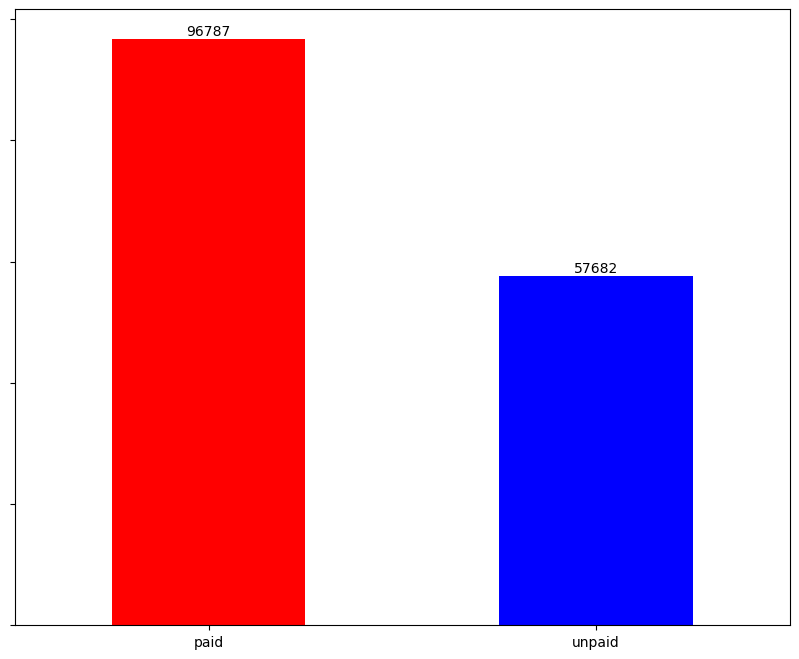

In [ ]:
#visualizando graficamente

df_charges.status.value_counts().plot(kind='bar', figsize=(10,8), color=['red', 'blue'])
#plt.bar_label()
plt.xticks( rotation=0) ;
plt.gca().set_yticklabels([])

# Obtenha os valores das contagens
counts = df_charges.status.value_counts()

# Adicione os rótulos de dados acima de cada barra
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')


plt.show()

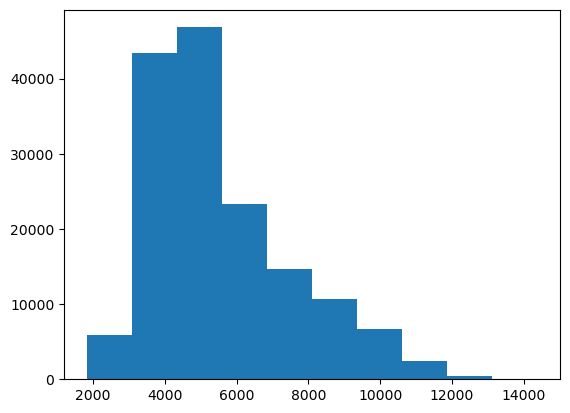

In [ ]:
# Criando um histograma para verificarmos a distribuição dos valores das transações
plt.hist(df_charges.value)

plt.show()

Observamos uma assimetria à direita. Ou seja, a maioria dos valores estão à esquerda da média.
Nesse tipo de situação, a média não traz algo relevante.

## Mesclando as tabelas 'accounts' , 'address' e 'transactions'

- address: Tabela que identifica os pares de estado e cidade.


In [ ]:
query_1 = '''
SELECT accounts.account_number, birth, occupation, state, city, transaction_type_id, value
FROM accounts
INNER JOIN  address ON accounts.address_id = address.id
    INNER JOIN  transactions ON accounts.account_number = transactions.account_number
'''

cursor.execute(query_1)
result = cursor.fetchall()

for row in result:
    print(row)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df_accounts_address_transactions = pd.read_sql(query_1, conn)
df_accounts_address_transactions.head(20)

,account_number,birth,occupation,state,city,transaction_type_id,value
0,155938,1984-10-29,Outros,RJ,Carmo,1,11992
1,155938,1984-10-29,Outros,RJ,Carmo,1,9689
2,155938,1984-10-29,Outros,RJ,Carmo,1,11579
3,155938,1984-10-29,Outros,RJ,Carmo,3,11168
4,155938,1984-10-29,Outros,RJ,Carmo,3,10772
5,155938,1984-10-29,Outros,RJ,Carmo,3,11404
6,747007,1977-03-26,Corretor,MG,Bertopolis,1,3085
7,747007,1977-03-26,Corretor,MG,Bertopolis,1,3893
8,747007,1977-03-26,Corretor,MG,Bertopolis,1,3576
9,208404,1984-01-26,Analista,MG,Olaria,1,5427


In [ ]:
# agrupando informações

df_accounts_address_transactions.groupby(['occupation','state'])['transaction_type_id'].count()

occupation     state
Analista       BA        4147
               ES        7232
               GO        3517
               MG       23180
               PR        7721
               RJ       10689
               SC        4670
               SP        3992
Autonomo       BA         602
               ES        2094
               GO         725
               MG        3664
               PR        2946
               RJ        1441
               SP        1377
Corretor       BA        4364
               ES       10532
               GO        1390
               MG       17384
               PR        8504
               RJ        9628
               SC        1361
               SP        3333
Desenvolvedor  BA        2764
               ES        5983
               GO        5544
               MG       24479
               PR        8161
               RJ       10249
               SC        2895
               SP        2578
Investidor     BA        1264
               ES  

In [ ]:
#visualizando graficamente

df_groupby1 = df_accounts_address_transactions.groupby(['occupation'])['transaction_type_id'].count()

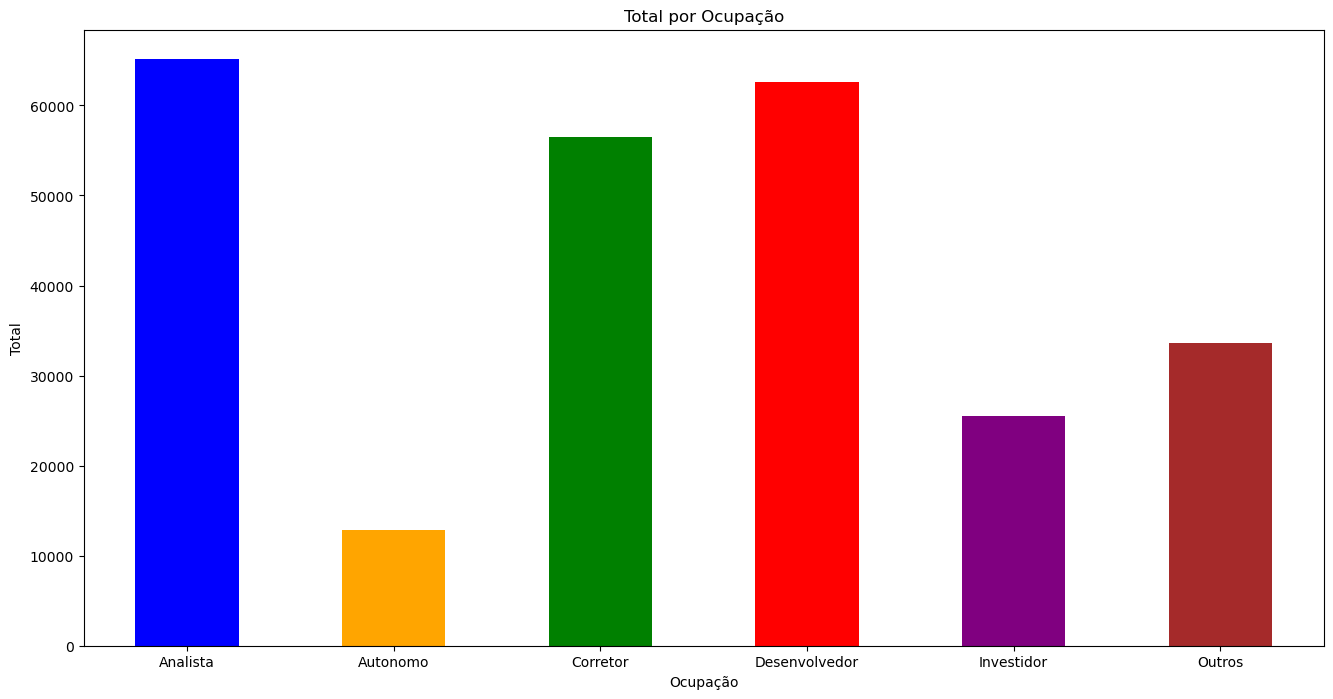

In [ ]:
plt.figure(figsize=(16, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
df_groupby1.plot(kind='bar', color=colors)

plt.title('Total por Ocupação')
plt.xlabel('Ocupação')
plt.ylabel('Total')
plt.xticks( rotation=0)
plt.show()

Verificamos que a ocupação Analista e Desenvolvedor realizaram mais transações.

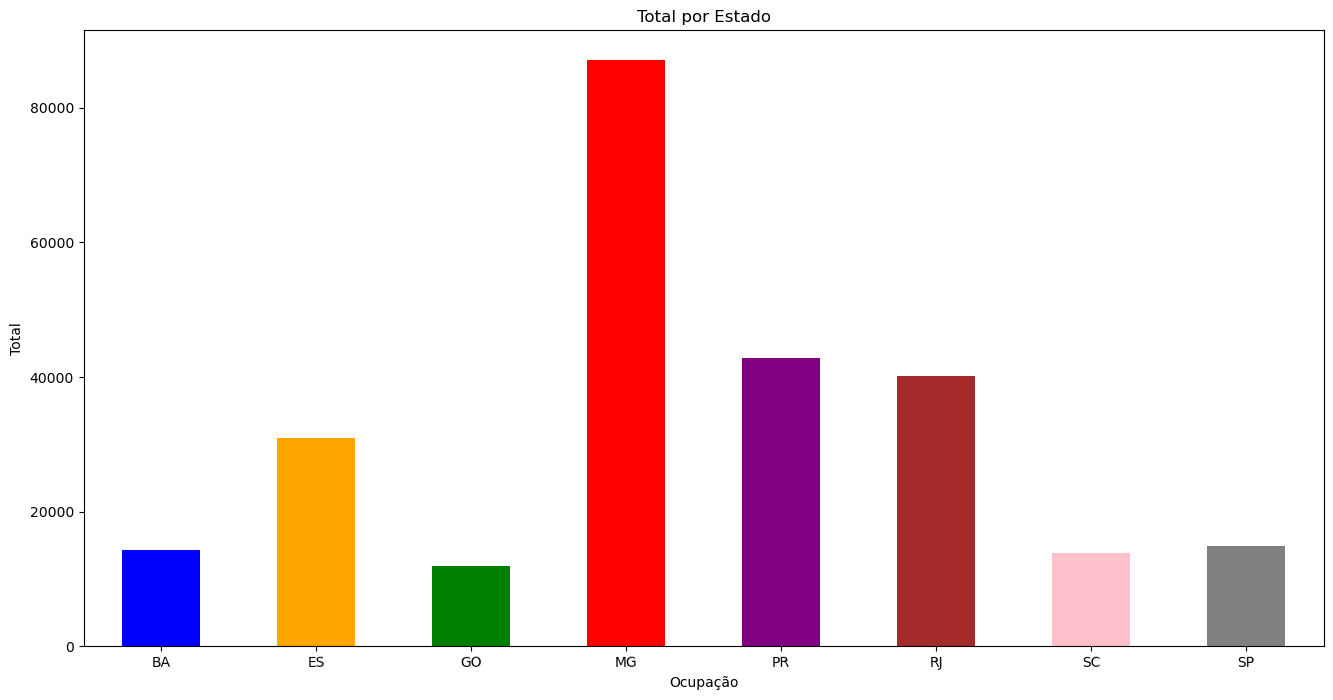

In [ ]:


df_groupby2 = df_accounts_address_transactions.groupby(['state'])['transaction_type_id'].count()
plt.figure(figsize=(16, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
df_groupby2.plot(kind='bar', color=colors)

plt.title('Total por Estado')
plt.xlabel('Ocupação')
plt.ylabel('Total')
plt.xticks( rotation=1)
plt.show()




Minas Gerais - MG É o estado que mais realizou transações.

In [ ]:
# fazendo uma relação cruzada entre 'state' e 'transaction_type_id'

tipo_transacao = {1:'Boleto Recebido', 2:'Pix Enviado', 3:'Pix Recebido'} # para maiores informações veja o dicionário de dados



df_cross_state_transc_id = pd.crosstab(df_accounts_address_transactions.state, df_accounts_address_transactions.transaction_type_id)
df_cross_state_transc_id.rename(columns=tipo_transacao, inplace=True)



In [ ]:
df_cross_state_transc_id

transaction_type_id,Boleto Recebido,Pix Enviado,Pix Recebido
state,,,
BA,5311,547,8420
ES,11736,1434,17758
GO,4801,450,6749
MG,33597,3333,50231
PR,14903,2618,25278
RJ,14503,2099,23560
SC,6170,496,7271
SP,5766,525,8671


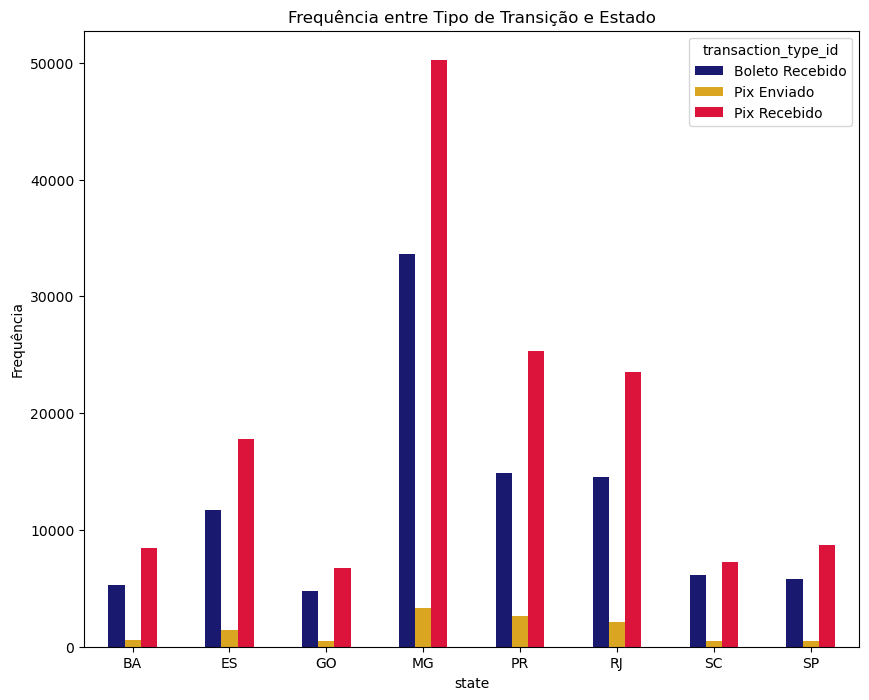

In [ ]:
# graficamente

df_cross_state_transc_id.plot(kind='bar', figsize=(10,8), color=['midnightblue', 'goldenrod', 'crimson'])
plt.title( "Frequência entre Tipo de Transição e Estado" )
plt.ylabel( "Frequência" )

plt.xticks( rotation=0) ;




In [ ]:
df_cross_state_transc_id

transaction_type_id,Boleto Recebido,Pix Enviado,Pix Recebido
state,,,
BA,5311,547,8420
ES,11736,1434,17758
GO,4801,450,6749
MG,33597,3333,50231
PR,14903,2618,25278
RJ,14503,2099,23560
SC,6170,496,7271
SP,5766,525,8671


In [ ]:
df_accounts_address_transactions.head()

,account_number,birth,occupation,state,city,transaction_type_id,value
0,155938,1984-10-29,Outros,RJ,Carmo,1,11992
1,155938,1984-10-29,Outros,RJ,Carmo,1,9689
2,155938,1984-10-29,Outros,RJ,Carmo,1,11579
3,155938,1984-10-29,Outros,RJ,Carmo,3,11168
4,155938,1984-10-29,Outros,RJ,Carmo,3,10772


In [ ]:
query_4 ='''
SELECT accounts.account_number, birth, occupation, email,state, city, transaction_type_id, value

FROM accounts


INNER JOIN  address ON accounts.address_id = address.id
    INNER JOIN  transactions ON accounts.account_number = transactions.account_number
'''

cursor.execute(query_4)
result = cursor.fetchall()

for row in result:
    print(row)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df_query4 = pd.read_sql(query_4, conn)
df_query4.head(103)

,account_number,birth,occupation,email,state,city,transaction_type_id,value
0,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,RJ,Carmo,1,11992
1,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,RJ,Carmo,1,9689
2,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,RJ,Carmo,1,11579
3,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,RJ,Carmo,3,11168
4,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,RJ,Carmo,3,10772
...,...,...,...,...,...,...,...,...
98,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,RJ,Carmo,3,11359
99,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,RJ,Carmo,3,9988
100,747007,1977-03-26,Corretor,ananunes3@example.com,MG,Bertopolis,3,2709
101,747007,1977-03-26,Corretor,ananunes3@example.com,MG,Bertopolis,3,3157


In [ ]:
# utilizando o sweetViz para visualização de dados

#analisando dados

report = sv.analyze(df_query4)

#gerando report

report.show_html('eda_report_charges.html')



C:\Users\basfe\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\basfe\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

C:\Users\basfe\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\basfe\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\basfe\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\basfe\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"]

Report eda_report_charges.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Analisando a tabela 'levels'

Cada conta recebe uma classificação de acordo com a forma que utiliza a plataforma. Contas que utilizam com maior consistência ou com grande potêncial podem receber uma melhor classificação (A>B>C>F). Caso identifique-se que a conta possui características suspeitas, de fraude, é atribuída a categoria F e executado o encerramento).

In [ ]:
cursor.execute("SELECT * FROM levels")
result = cursor.fetchall()

for row in result:
    print(row)

(1, 155938, 'F', '2021-04-20 08:00:00')
(2, 747007, 'D', '2021-04-19 19:30:00')
(4, 66402, 'D', '2021-04-28 21:00:00')
(5, 277012, 'D', '2021-04-19 12:00:00')
(6, 228213, 'D', '2021-04-26 15:00:00')
(10, 343595, 'D', '2021-04-12 15:00:00')
(11, 760897, 'C', '2021-04-27 07:00:00')
(12, 10621, 'F', '2021-04-23 09:00:00')
(13, 222177, 'F', '2021-04-16 09:30:00')
(14, 454867, 'C', '2021-04-21 16:30:00')
(15, 842594, 'A', '2021-04-24 22:00:00')
(16, 63383, 'D', '2021-04-16 14:30:00')
(17, 81331, 'C', '2021-04-28 10:30:00')
(18, 871021, 'F', '2021-04-28 22:00:00')
(19, 803613, 'C', '2021-04-23 07:00:00')
(20, 66561, 'F', '2021-04-25 14:30:00')
(21, 422360, 'A', '2021-05-01 19:00:00')
(22, 583097, 'F', '2021-04-22 07:00:00')
(23, 857149, 'D', '2021-04-28 17:00:00')
(24, 418279, 'D', '2021-04-28 17:30:00')
(25, 106377, 'C', '2021-04-17 12:30:00')
(26, 416756, 'C', '2021-04-30 17:00:00')
(27, 106463, 'F', '2021-04-23 20:00:00')
(28, 688913, 'C', '2021-04-25 12:30:00')
(29, 995447, 'B', '2021-04

In [ ]:
df_levels = pd.read_sql("SELECT * FROM levels", conn)
df_levels.head()

,id,account_number,level,created_at
0,1,155938,F,2021-04-20 08:00:00
1,2,747007,D,2021-04-19 19:30:00
2,4,66402,D,2021-04-28 21:00:00
3,5,277012,D,2021-04-19 12:00:00
4,6,228213,D,2021-04-26 15:00:00


In [ ]:
df_levels.level.value_counts()

D    348
C    264
F    204
B     75
A     35
Name: level, dtype: int64

Existem 204 contas classificadas com 'F'. Ou seja, há 204 suspeitas de fraudes.

In [ ]:
query_5 ='''
SELECT levels.account_number, level, transaction_type_id, value

FROM levels


INNER JOIN transactions  ON levels.account_number = transactions.account_number

'''

cursor.execute(query_5)
result = cursor.fetchall()

for row in result:
    print(row)

(155938, 'F', 1, 9689)
(155938, 'F', 1, 9731)
(155938, 'F', 1, 10169)
(155938, 'F', 1, 10280)
(155938, 'F', 1, 10531)
(155938, 'F', 1, 10584)
(155938, 'F', 1, 10645)
(155938, 'F', 1, 10707)
(155938, 'F', 1, 10823)
(155938, 'F', 1, 10866)
(155938, 'F', 1, 11031)
(155938, 'F', 1, 11219)
(155938, 'F', 1, 11264)
(155938, 'F', 1, 11562)
(155938, 'F', 1, 11579)
(155938, 'F', 1, 11592)
(155938, 'F', 1, 11692)
(155938, 'F', 1, 11697)
(155938, 'F', 1, 11836)
(155938, 'F', 1, 11902)
(155938, 'F', 1, 11992)
(155938, 'F', 1, 12037)
(155938, 'F', 1, 12121)
(155938, 'F', 1, 12126)
(155938, 'F', 1, 12162)
(155938, 'F', 1, 12199)
(155938, 'F', 1, 12297)
(155938, 'F', 1, 12417)
(155938, 'F', 1, 12549)
(155938, 'F', 1, 13151)
(155938, 'F', 2, 21488)
(155938, 'F', 2, 33946)
(155938, 'F', 2, 36406)
(155938, 'F', 2, 45061)
(155938, 'F', 2, 56357)
(155938, 'F', 2, 58843)
(155938, 'F', 2, 59192)
(155938, 'F', 2, 60395)
(155938, 'F', 2, 65524)
(155938, 'F', 2, 67194)
(155938, 'F', 2, 68774)
(155938, 'F', 2, 7

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(346456, 'D', 3, 4189)
(346456, 'D', 3, 4198)
(346456, 'D', 3, 4201)
(346456, 'D', 3, 4210)
(346456, 'D', 3, 4211)
(346456, 'D', 3, 4216)
(346456, 'D', 3, 4243)
(346456, 'D', 3, 4249)
(346456, 'D', 3, 4261)
(346456, 'D', 3, 4276)
(346456, 'D', 3, 4277)
(346456, 'D', 3, 4290)
(346456, 'D', 3, 4291)
(346456, 'D', 3, 4294)
(346456, 'D', 3, 4294)
(346456, 'D', 3, 4304)
(346456, 'D', 3, 4321)
(346456, 'D', 3, 4331)
(346456, 'D', 3, 4340)
(346456, 'D', 3, 4342)
(346456, 'D', 3, 4344)
(346456, 'D', 3, 4347)
(346456, 'D', 3, 4355)
(346456, 'D', 3, 4381)
(346456, 'D', 3, 4383)
(346456, 'D', 3, 4384)
(346456, 'D', 3, 4389)
(346456, 'D', 3, 4396)
(346456, 'D', 3, 4423)
(346456, 'D', 3, 4424)
(346456, 'D', 3, 4428)
(346456, 'D', 3, 4445)
(346456, 'D', 3, 4459)
(346456, 'D', 3, 4474)
(346456, 'D', 3, 4475)
(346456, 'D', 3, 4478)
(346456, 'D', 3, 4499)
(346456, 'D', 3, 4503)
(346456, 'D', 3, 4510)
(346456, 'D', 3, 4516)
(346456, 'D', 3, 4519)
(346456, 'D', 3, 4526)
(346456, 'D', 3, 4552)
(346456, 'D

In [ ]:
### Mesclando as tabelas 'levels' e 'transactions'

In [ ]:
df_query5 = pd.read_sql(query_5, conn)
df_query5.head(103)

,account_number,level,transaction_type_id,value
0,155938,F,1,9689
1,155938,F,1,9731
2,155938,F,1,10169
3,155938,F,1,10280
4,155938,F,1,10531
...,...,...,...,...
98,155938,F,3,12489
99,155938,F,3,12500
100,155938,F,3,12556
101,155938,F,3,12641


In [ ]:
df_groupby2 = df_query5.groupby(['level','transaction_type_id'])['value'].sum()

In [ ]:
df_groupby2

level  transaction_type_id
A      1                       33389308
       2                       82970886
       3                       55454602
B      1                       85841964
       2                      201082196
       3                      126889321
C      1                      129752585
       2                      276434226
       3                      189447206
D      1                      171666769
       2                      367038175
       3                      248286052
F      1                       46406171
       2                      149119417
       3                      112836123
Name: value, dtype: int64

In [ ]:
# verificando a média

df_groupby2.mean()

151774333.4

In [ ]:
# utilizando o sweetViz para visualização de dados

#analisando dados

report = sv.analyze(df_query5)

#gerando report

report.show_html('eda_report_levels.html')

C:\Users\basfe\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\basfe\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

C:\Users\basfe\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\basfe\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\basfe\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\basfe\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\bas

Report eda_report_levels.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Conclusão

Neste post, vimos algumas análises descritivas que possibilitaram responder algumas perguntas como: distribuição dos dados, informações cruzadas entre variáveis, qual estado realizou mais transações, quantidade de boletos pagos e não pagos, entre outros.

A análise exploratória de dados utilizando Python e SQL é uma abordagem essencial para entender e extrair informações valiosas de conjuntos de dados. Ao combinar a poderosa linguagem de programação Python com a flexibilidade e capacidade de consulta do SQL, é possível obter insights significativos para tomada de decisão. Através da exploração de dados, podemos identificar padrões, tendências e anomalias, além de realizar visualizações eficazes. Essa abordagem permite compreender melhor o contexto dos dados, realizar transformações necessárias e prepará-los para análises mais aprofundadas. Com a análise exploratória de dados em Python e SQL, podemos tomar decisões mais informadas e embasadas em evidências, impulsionando o sucesso dos projetos e das organizações como um todo.